In [ ]:
import pandas as pd
import numpy as np
import plotly
import cufflinks as cf
cf.go_offline(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

In [38]:
# 데이터 수집
bank = pd.read_excel("/content/drive/MyDrive/data/Bank_Personal_Loan_Modelling.xlsx", sheet_name = 1) # 두번째 시트만 로드
bank.head()
#print(bank.shape)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
'''
ID : 고객번호
Age : 나이
Experience : 사회생활 경험(직장 경험)
Income : 수입
Zipcode : 우편번호
Family : 가족구성원수
CCavg : 신용카드 월평균 이용 금액
Education : 학력(1:Undergrad, 2:Graduate, 3:Advanced/Professional)
Mortgage : 주택 담보 대출 금액(천 단위)
Personal Load : 지난번 영업에서 고객이 개인대출을 받았는가(0:N, 1:Y)
Securitied Account : 보험 유무(0:N, 1:Y)
CD Account : 양도성 예금증서 보유 유무(0:N, 1:Y)
Online : 온라인 뱅킹 유무(0:N, 1:Y)
Credit Card : 신용카드 보유 유무(0:N, 1:Y) # 카드사의 카드 인지 아닌지
'''

In [44]:
bank.isnull().sum() # 결측치 확인
print('-' * 50)
bank.info() # 정보 확인
print('-' * 50)
bank.describe()
print('-' * 50)
type(bank)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
-----

pandas.core.frame.DataFrame

In [45]:
# 변수형 컬럼 확인, unique : 고유값을 구분
print("Education : ", bank["Education"].unique())
print("Personal Loan : ", bank["Personal Loan"].unique())
print("Securities Account : ", bank["Securities Account"].unique())
print("Online : ", bank["Online"].unique())
print("Credit Card : ", bank["CreditCard"].unique())

Education :  [1 2 3]
Personal Loan :  [0 1]
Securities Account :  [1 0]
Online :  [0 1]
Credit Card :  [0 1]


In [47]:
bank.describe().T # T : 트랜스포즈

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [78]:
# 데이터 정리
print("총 데이터 수 : ", bank.shape[0] * bank.shape[1])
print("총 결측치 수 : ", bank.isnull().sum().sum())
print("고객의 나이는 {}부터 {}까지 있으며 평균 나이는 {:.1f}세 이다.".format((bank['Age'].min()), (bank['Age'].max()), (bank['Age'].mean())))
print("고객의 평균 수입은 {:.1f} $이며, 최고수입은 {} $로 평균의 {:.1f}배이다.".format((bank['Income'].mean()*1000), (bank['Income'].max()*1000), (bank['Income'].max() / (bank['Income'].mean()))))

총 데이터 수 :  70000
총 결측치 수 :  0
고객의 나이는 23부터 67까지 있으며 평균 나이는 45.3세 이다.
고객의 평균 수입은 73774.2 $이며, 최고수입은 224000 $로 평균의 3.0배이다.


In [ ]:
'''
수입 / 가족인원수와 대출 사이의 관계는 / 월평균신용카드사용량 ?
변수형 컬럼의 분포 확인
각 컬럼간의 상관관계는 ?
월 평균 사용 금액을 구간화해서 특징을 볼 수 있을까?
'''

In [79]:
bank_loan = bank.copy()
bank_loan.head()
bank_loan = bank_loan.groupby("Personal Loan")['Income'].agg(['mean', 'count'])
bank_loan = bank_loan.rename(columns= {"mean" : "수입 평균", "count" : "고객 수"})
bank_loan

,수입 평균,고객 수
Personal Loan,,
0,66.237389,4520
1,144.745833,480


In [60]:
bank_loan_family = bank.copy()
bank_loan_family = bank_loan_family.groupby("Family")['Personal Loan'].agg(['mean', 'count'])
bank_loan_family = bank_loan_family.rename(columns= {"mean" : "개인 대출 평균", "count" : "고객 수"})
bank_loan_family

,개인 대출 평균,고객 수
Family,,
1,0.072690,1472
2,0.081790,1296
3,0.131683,1010
4,0.109656,1222


In [64]:
# 월평균신용카드사용량, bins = 나누고자 하는 단위
# CCavg : 신용카드 월평균 이용 금액
bank_loan_sec = bank.copy()
bank_loan_sec = bank[["CCAvg", "CreditCard", "Personal Loan"]]
bank_loan_sec["ccavg_bin"] = pd.cut(bank_loan_sec["CCAvg"], bins = [0, 2, 4, 6, 100], labels = ["0~2","3-4", "5-6", "7+" ])
bank_loan_sec.head()

<ipython-input-64-6d13b63dd62c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_loan_sec["ccavg_bin"] = pd.cut(bank_loan_sec["CCAvg"], bins = [0, 2, 4, 6, 100], labels = ["0~2","3-4", "5-6", "7+" ])


,CCAvg,CreditCard,Personal Loan,ccavg_bin
0,1.6,0,0,0~2
1,1.5,0,0,0~2
2,1.0,0,0,0~2
3,2.7,0,0,3-4
4,1.0,1,0,0~2


In [66]:
# 구간별 신용카드 유무와 신용카드 월평균 사용액 집계
df2 = bank_loan_sec.groupby(["ccavg_bin", "CreditCard"])["CCAvg"].sum().reset_index()
df2

,ccavg_bin,CreditCard,CCAvg
0,0~2,0,2172.366667
1,0~2,1,930.333333
2,3-4,0,2361.250000
3,3-4,1,970.250000
4,5-6,0,1097.300000
5,5-6,1,413.533333
6,7+,0,1236.533333
7,7+,1,508.000000


<Axes: xlabel='Income', ylabel='CCAvg'>

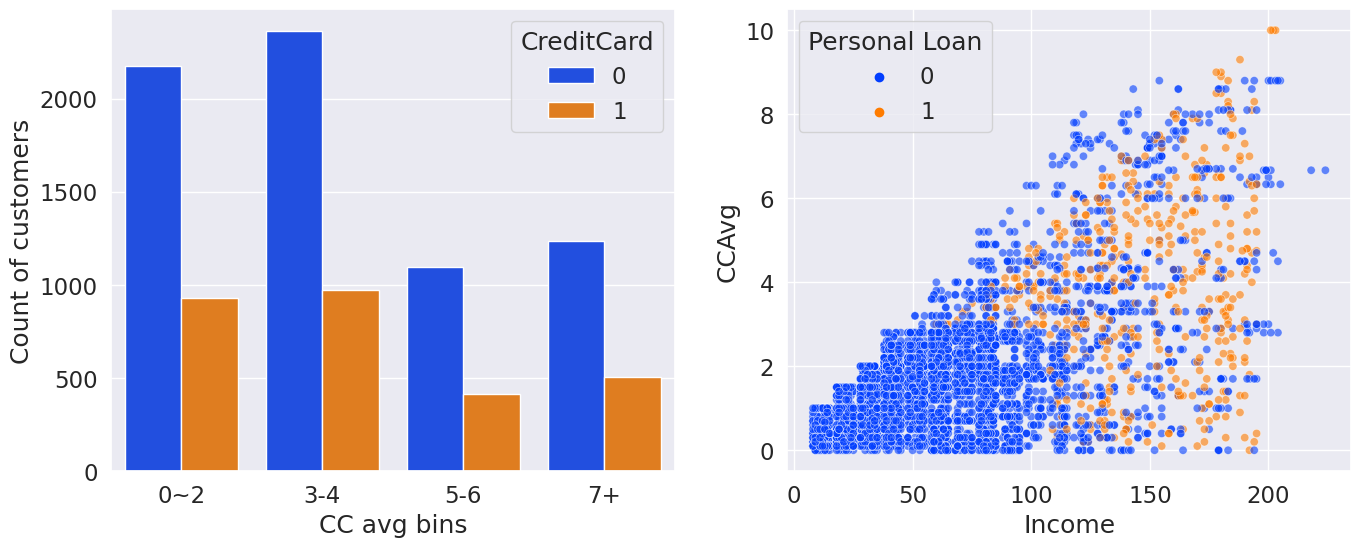

In [74]:
# 구간별 신용카드 유무와 신용카드 월 평균 사용액 시각화
f, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.barplot(data = df2, x = 'ccavg_bin', y = 'CCAvg', hue = 'CreditCard', ax = ax[0])
ax[0].set(xlabel = "CC avg bins", ylabel = "Count of customers")

# 수입과 신용카드 월 평균 사용액 시각화
sns.scatterplot(data = bank, x = 'Income', y = 'CCAvg', hue = 'Personal Loan', ax = ax[1], alpha = 0.6)

In [77]:
'''
ID : 고객번호
Age : 나이
Experience : 사회생활 경험(직장 경험)
Income : 수입
Zipcode : 우편번호
Family : 가족구성원수
CCavg : 신용카드 월평균 이용 금액
Education : 학력(1:Undergrad, 2:Graduate, 3:Advanced/Professional)
Mortgage : 주택 담보 대출 금액(천 단위)
Personal Load : 지난번 영업에서 고객이 개인대출을 받았는가(0:N, 1:Y)
Securitied Account : 보험 유무(0:N, 1:Y)
CD Account : 양도성 예금증서 보유 유무(0:N, 1:Y)
Online : 온라인 뱅킹 유무(0:N, 1:Y)
Credit Card : 신용카드 보유 유무(0:N, 1:Y)
'''

# 대출받은 사람이 받지 않은 사람과의 상관관계(사람 숫자)
# 대출받은 사람과 받지 않은 사람과의 상관관계(사용량-신용카드 사용액)

In [ ]:
# 총 정리